# Setup

In [1]:
%matplotlib inline

import numpy as np
import scipy.signal as sig
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
import os
import h5py
import datetime

import pandas as pd

General info

In [33]:
savePlots = True    # whether or not to save plots
saveData = True # whether or not to save csv files

saveAsPath = './Fig 09/'
if not os.path.exists(saveAsPath):
    os.mkdir(saveAsPath)

saveAsName = 'Fig9c_'

In [3]:
#path = '/Users/svcanavan/Dropbox/Coding in progress/00_BudgieSleep/Data_copies/'

birdPaths =    ['../data_copies/01_PreprocessedData/01_BudgieFemale_green1/00_Baseline_night/',
                '../data_copies/01_PreprocessedData/02_BudgieMale_yellow1/00_Baseline_night/',
                '../data_copies/01_PreprocessedData/03_BudgieFemale_white1/00_Baseline_night/',
                '../data_copies/01_PreprocessedData/04_BudgieMale_yellow2/00_Baseline_night/',
                '../data_copies/01_PreprocessedData/05_BudgieFemale_green2/00_Baseline_night/']

arfFilePaths =  ['EEG 2 scored/',
                 'EEG 3 scored/',
                 'EEG 3 scored/',
                 'EEG 4 scored/',
                 'EEG 4 scored/']

### load BEST EEG channels - as determined during manual scoring ####
channelsToLoadEEG_best = [['6 LEEGm-LEEGp', '5 LEEGf-LEEGp'], #, '9 REEGp-LEEGp'], # extra channel to represent R hemisphere
                     ['5 LEEGf-LEEGm', '4 LEEGf-Fgr'], #, '9 REEGf-REEGm'], # extra channel to represent R hemisphere
                     ['9REEGm-REEGp', '4LEEGf-LEEGp'], 
                     ['6LEEGm-LEEGf', '9REEGf-REEGp'], 
                     ['7REEGf-REEGp', '4LEEGf-LEEGp']]


### load ALL of EEG channels ####
channelsToLoadEEG = [['4 LEEGf-Fgr', '5 LEEGf-LEEGp', '6 LEEGm-LEEGp', '7 LEEGp-Fgr', '8 REEGp-Fgr','9 REEGp-LEEGp'],
                     ['4 LEEGf-Fgr','5 LEEGf-LEEGm', '6 LEEGm-LEEGp', '7 REEGf-Fgr', '8 REEGm-Fgr', '9 REEGf-REEGm'],
                     ['4LEEGf-LEEGp', '5LEEGf-LEEGm', '6LEEGm-LEEGp', '7REEGf-REEGp', '8REEGf-REEGm', '9REEGm-REEGp'],
                     ['4LEEGf-LEEGp', '5LEEGm-LEEGp', '6LEEGm-LEEGf', '7REEGf-Fgr', '8REEGf-REEGm','9REEGf-REEGp',],
                     ['4LEEGf-LEEGp', '5LEEGf-LEEGm', '6LEEGm-LEEGp', '7REEGf-REEGp', '8REEGf-REEGm', '9REEGm-REEGp']]


channelsToLoadEOG = [['1 LEOG-Fgr', '2 REOG-Fgr'],
                     ['2 LEOG-Fgr', '3 REOG-Fgr'],
                     ['2LEOG-Fgr', '3REOG-Fgr'],
                     ['2LEOG-Fgr', '3REOG-Fgr'],
                     ['2LEOG-Fgr', '3REOG-Fgr']]

birds_LL = [1,2,3]
nBirds_LL = len(birds_LL)

birdPaths_LL = ['../data_copies/01_PreprocessedData/02_BudgieMale_yellow1/01_Constant_light/',
                '../data_copies/01_PreprocessedData/03_BudgieFemale_white1/01_Constant_light/',
                '../data_copies/01_PreprocessedData/04_BudgieMale_yellow2/01_Constant_light/',]

arfFilePaths_LL =  ['EEG 2 preprocessed/',
                    'EEG 2 preprocessed/',
                    'EEG 2 preprocessed/']

lightsOffSec = np.array([7947, 9675, 9861 + 8*3600, 9873, 13467])  # lights off times in seconds from beginning of file
lightsOnSec = np.array([46449, 48168, 48375+ 8*3600, 48381, 52005]) # Bird 3 gets 8 hours added b/c file starts at 8:00 instead of 16:00

epochLength = 3
sr = 200
scalingFactor = (2**15)*0.195       # scaling/conversion factor from amplitude to uV (when recording arf from jrecord)

stages = ['w','d','u','i','s','r'] # wake, drowsy, unihem sleep, intermediate sleep, SWS, REM
stagesSleep =    ['u','i','s','r']

stagesVideo = ['m','q','d','s','u'] # moving wake, quiet wake, drowsy, sleep, unclear

## Path to scores formatted as CSVs
formatted_scores_path = '../formatted_scores/'

## Path to detect SW ands EM events: use folder w/ EMs and EM artifacts detected during non-sleep
events_path = '../data_copies/SWs_EMs_and_EMartifacts/'

colorpalette from iWantHue

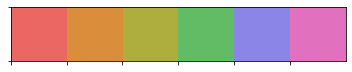

In [4]:
# PSG scores
colors = sns.color_palette(np.array([[234,103,99],
[218,142,60],
[174,174,62],
[97,188,101],
[140,133,232],
[225,113,190]])
/255)

sns.palplot(colors)

# colorpalette from iWantHue

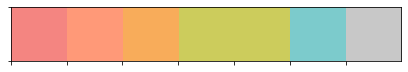

In [5]:
# video scores
colors_video = sns.color_palette(np.array([[244,133,129],
                                           [255,153,120],
                                            [248,172,90],
                                            [204,204,92],
                                            [204,204,92],
                                            [124, 203, 204],
                                            [200, 200, 200]])
                                            /(255))

sns.palplot(colors_video)

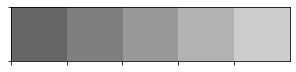

In [6]:
colors_birds = [np.repeat(.4, 3),
                np.repeat(.5, 3),
                np.repeat(.6, 3),
                np.repeat(.7, 3),
                np.repeat(.8, 3)]

sns.palplot(colors_birds)


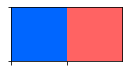

In [7]:
LD_color=[0, 102/255, 1]
LL_color=[1, 99/255, 99/255]

sns.palplot([LD_color, LL_color])

Plot-specific info

In [8]:
sns.set_context("notebook", font_scale=1.5)
sns.set_style("white")

# Markers for legends of EEG scoring colors
legendMarkersEEG = []
for stage in range(len(stages)):
    legendMarkersEEG.append(plt.Line2D([0],[0], color=colors[stage], marker='o', linestyle='', alpha=0.7))  

Calculate general variables

In [9]:
lightsOffEp = lightsOffSec / epochLength
lightsOnEp = lightsOnSec / epochLength

nBirds = len(birdPaths)

epochLengthPts = epochLength*sr

nStages = len(stagesSleep)

## Calculate lights off in Zeitgeber time (s and hrs)
## Lights on is 0 

lightsOffZeit_s = lightsOffSec - lightsOnSec
lightsOffZeit_hr = lightsOffZeit_s / 3600

Plot formatting

In [10]:
figsize = (8,6)
axis_label_fontsize = 24

# Line formatting
linewidth = 5
linealpha = .7
marker = 'o'
markersize = 10
err_capsize = 3
err_capthick = 3
elinewidth = 3

# Bar formatting
bar_linewidth = 4

# Load data

## Read in files

In [11]:
AllScores = {}
for b in range(nBirds):
    bird_name = 'Bird ' + str(b+1)
    file = formatted_scores_path + 'All_scores_' + bird_name + '.csv'
    data = pd.read_csv(file, index_col=0)
    
    # if any epochs missing, mark as unclear
    date_index = pd.date_range(data.index.values[0], end=data.index.values[-1], freq='3s')
    data_reindexed = data.reindex(date_index.astype('str'))
    data_reindexed['Video Label'].fillna('u', inplace=True)
    
    # interpolate Time-related columns
    time_columns = ['Time (s)', 'Time (h)', 'Zeitgeber time (s)', 'Zeitgeber time (h)', 
                    'Zeitgeber time (ep)', 'Epoch #']
    data_interpolated = data_reindexed.copy()
    data_interpolated[time_columns] = data_reindexed[time_columns].interpolate()
    
    AllScores[bird_name] = data_interpolated

In [12]:
# LL
for b in [1,2,3]:
    bird_name = 'Bird ' + str(b+1)
    file = formatted_scores_path + 'All_scores_' + bird_name + 'LL.csv'
    data = pd.read_csv(file, index_col=0)
    AllScores[bird_name + 'LL'] = data

## Convert video labels to numbers

In [13]:
birds = list(AllScores.keys())

In [14]:
# LD #
for b_name in birds:

    b_num = int(b_name[5]) - 1
    Scores = AllScores[b_name]

    Label_num = -1 * np.ones_like(Scores['Video Label'])
    for st in range(len(stagesVideo)):
        stage_inds = [x for x in range(len(Scores['Video Label'])) if stagesVideo[st] in Scores['Video Label'].iloc[x]]
        Label_num[stage_inds] = st

    # Preening/singing labels
    stage_inds = [x for x in range(len(Scores['Video Label']))
                  if ('p' in Scores['Video Label'].iloc[x])|('si' in Scores['Video Label'].iloc[x])]
    Label_num[stage_inds] = 0
    
    # Unihem labels
    stage_inds = [x for x in range(len(Scores['Video Label'])) 
                  if ('r' in Scores['Video Label'].iloc[x])]
    Label_num[stage_inds] = 4

    # Save to dataframe
    AllScores[b_name]['Video Label (#)'] = Label_num

In [15]:
stagesVideo

['m', 'q', 'd', 'l', 'g', 's', 'u']

# Get lengths of sleep episodes - based on video recording only

## Merge continuous epochs of the same stage, same length & start time

In [16]:
ScoresMerged = {}

for bird in birds:

    scores = AllScores[bird]
    
    # add a "stop" column
    scores['Stop (s)'] = scores['Time (s)'] + epochLength
    
    original_end_s = scores['Stop (s)'].iloc[-1]
        
    # add a column to keep track of consecutive epochs of the same stage
    scores['episode #'] = (scores['Video Label'] != scores['Video Label'].shift(1)).astype(int).cumsum()
        # don't worry about the gaps where the video recording restarted
        # if the behavior is the same before and after the gap, count it as a continuous episode
        # if you want to split episodes where the gap occurs, add:
        #     (scores['Stop (s)'] == scores['Time (s)'].shift(-1))
    
    # combine all epochs of the same episode # and use the values from the first epoch of that episode
    merged_scores = scores.groupby(scores['episode #']).aggregate('first')
    
    # calculate length of each episode
    lengths = merged_scores['Time (s)'].shift(-1) - merged_scores['Time (s)']
    lengths.iloc[-1] = original_end_s - merged_scores['Time (s)'].iloc[-1]
    
    merged_scores['Length (s)'] = lengths
    
    ScoresMerged[bird] = merged_scores

### Check lengths

In [17]:
bird = 'Bird 4'

In [18]:
print(len(AllScores[bird]) * epochLength/3600) # original

print(ScoresMerged[bird]['Length (s)'].sum()/3600) # merged

print(ScoresMerged[bird]['Length (s)'].sum()/3600 - 36/3600) 
# merged, but subtract 6 seconds 
# for each of the 6 gaps where the video restarted


23.998333333333335
23.998333333333335
23.988333333333333


In [19]:
print(len(AllScores[bird + 'LL']) * epochLength/3600) # original

print(ScoresMerged[bird + 'LL']['Length (s)'].sum()/3600) # merged

print(ScoresMerged[bird + 'LL']['Length (s)'].sum()/3600 - 30/3600) 
# merged, but subtract 6 seconds for each of the 5 gaps where the video restarted

23.9225
24.016666666666666
24.008333333333333


# Total numbers of continuous episodes of each stage

In [20]:
SleepDurationStats = pd.DataFrame([])

In [21]:
n_sleep_pds = pd.Series([])
for bird in birds:
    n_episodes = ScoresMerged[bird]['Video Label (#)'].value_counts()
    #print(bird, '\t', n_episodes[5])
    n_sleep_pds.loc[bird] = n_episodes[5]
    
SleepDurationStats['# sleep pds'] = n_sleep_pds

n_sleep_pds

Bird 1      1077
Bird 2       180
Bird 3       319
Bird 4       465
Bird 5       198
Bird 2LL     547
Bird 3LL    1471
Bird 4LL     892
dtype: int64

# Overall average lengths

In [22]:
sleep_durations = pd.Series([])
sleep_durations_SD = pd.Series([])

for n,bird in enumerate(birds):
    scores = ScoresMerged[bird]
    avg_lengths = scores.groupby('Video Label (#)')['Length (s)'].mean()
    sd_lengths  = scores.groupby('Video Label (#)')['Length (s)'].std()
    
    sleep_durations.loc[bird] = avg_lengths[5]
    sleep_durations_SD.loc[bird] = sd_lengths[5]
    
    SleepDurationStats['sleep pd duration mean'] = sleep_durations
    SleepDurationStats['sleep pd duration SD'] = sleep_durations_SD

sleep_durations

Bird 1       35.206128
Bird 2      175.600000
Bird 3      122.332288
Bird 4       98.090323
Bird 5      172.727273
Bird 2LL     22.990859
Bird 3LL     15.385452
Bird 4LL     37.987668
dtype: float64

# REM latency

In [23]:
REM_Latencies = {}
for bird in birds:
    if 'LL' not in bird:
        REM_latencies_bird = []
        
        scores = AllScores[bird]
        
        # Go through each sleep episode, see if there is REM, and calculate the latency
        for episode_num in np.unique(scores['episode #']):
            episode_epochs = scores[scores['episode #']==episode_num]
            
            if episode_epochs.iloc[0]['Video Label (#)']==5: # sleep episodes only
                REM_epoch_inds = episode_epochs['Label (#)']==5
                if any(REM_epoch_inds):  # find REM epochs
                    episode_start_s = episode_epochs.iloc[0]['Time (s)']
                    REM_start_s = episode_epochs[REM_epoch_inds].iloc[0]['Time (s)']
                    REM_latency = REM_start_s - episode_start_s
                    REM_latencies_bird.append(REM_latency)
                    
        REM_Latencies[bird] = REM_latencies_bird


Bird 1    13.720137
Bird 2    24.633333
Bird 3    77.911765
Bird 4    26.724490
Bird 5    56.542373
dtype: float64

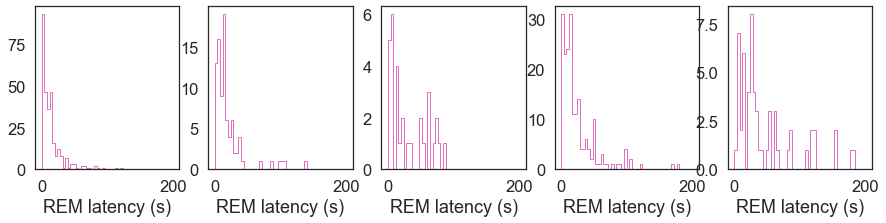

In [24]:
mean_REM_latencies = pd.Series([])
sd_REM_latencies   = pd.Series([])

plt.figure(figsize=(15,3))
for n, bird in enumerate(birds):
    if 'LL' not in bird:
        plt.subplot(1,5,n+1)
        plt.hist(REM_Latencies[bird], range=(0,200), bins=50, histtype='step', color=colors[5])
        plt.xlabel('REM latency (s)')
                
        mean_REM_latencies.loc[bird] = np.mean(REM_Latencies[bird])
        sd_REM_latencies.loc[bird]   = np.std(REM_Latencies[bird])
        
SleepDurationStats['REM latencies mean'] = mean_REM_latencies
SleepDurationStats['REM latencies SD']   = sd_REM_latencies

mean_REM_latencies

# FIGURE 9C: Sleep durations vs REM latencies

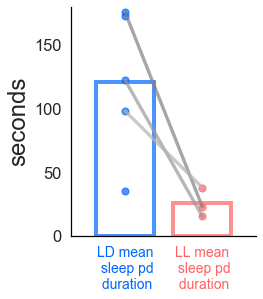

In [25]:
plot_colors = [LD_color, colors[5], LL_color]

axis_color = [.8,.8,.8]
with plt.rc_context({'axes.edgecolor': 'k'}):  # set color of plot outline

    plt.figure(figsize=(4,4.5))
    
    # Bar graph of means
    sleep_pd_durations = SleepDurationStats['sleep pd duration mean'][['Bird 1', 'Bird 2','Bird 3','Bird 4','Bird 5']].values
    REM_latencies = SleepDurationStats['REM latencies mean'][['Bird 1', 'Bird 2','Bird 3','Bird 4','Bird 5']].values
    sleep_pd_durations_LL = SleepDurationStats['sleep pd duration mean'][['Bird 2LL','Bird 3LL','Bird 4LL']].values
    
    
    plt.bar([0], np.mean(sleep_pd_durations),    width=.75, color='none', edgecolor=plot_colors[0], linewidth=4, alpha=linealpha)
    plt.bar([1], np.mean(sleep_pd_durations_LL), width=.75, color='none', edgecolor=plot_colors[2], linewidth=4, alpha=linealpha)

    # Line plot of each bird
    for bird in ['Bird 2', 'Bird 3', 'Bird 4']: # LL birds
        stats_LD = SleepDurationStats.loc[bird]
        stats_LL = SleepDurationStats.loc[bird + 'LL']

        plt.plot([0, 1],
                [stats_LD['sleep pd duration mean'],
                 stats_LL['sleep pd duration mean']],
                 alpha=linealpha, color=colors_birds[int(bird[5])-1],
                 lw=linewidth/1.5)

    for bird in ['Bird 1', 'Bird 5']: # LD-only birds
        stats_LD = SleepDurationStats.loc[bird]

    # Scatter plot of each plot in corresponding color
    plt.scatter(np.repeat(0,5), sleep_pd_durations,
                5*markersize, color=plot_colors[0], alpha=linealpha)
    plt.scatter(np.repeat(1,3), sleep_pd_durations_LL,
                5*markersize, color=plot_colors[2], alpha=linealpha)
    
    plt.xlim(-.7, 1.7)
    plt.ylim(0, 180)
    plt.xticks([0,1], [("LD mean\n sleep pd\n duration"), 
                         ('LL mean\n sleep pd\n duration')], fontsize=14)
    for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), [plot_colors[0], plot_colors[2]]):
        ticklabel.set_color(tickcolor)

    plt.ylabel('seconds', fontsize=axis_label_fontsize)  # y label only on leftmost plot

    sns.despine()
    plt.tight_layout()

if savePlots:
        plt.savefig(saveAsPath + saveAsName + "sleep_pd_durations_1_LLvLD.pdf")

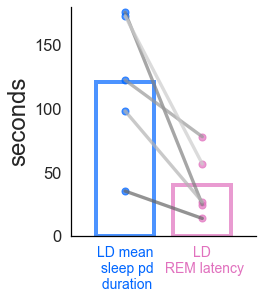

In [26]:
plot_colors = [LD_color, colors[5], LL_color]

axis_color = [.8,.8,.8]
with plt.rc_context({'axes.edgecolor': 'k'}):  # set color of plot outline

    plt.figure(figsize=(4,4.5))
    
    # Bar graph of means
    sleep_pd_durations = SleepDurationStats['sleep pd duration mean'][['Bird 1', 'Bird 2','Bird 3','Bird 4','Bird 5']].values
    REM_latencies = SleepDurationStats['REM latencies mean'][['Bird 1', 'Bird 2','Bird 3','Bird 4','Bird 5']].values
    sleep_pd_durations_LL = SleepDurationStats['sleep pd duration mean'][['Bird 2LL','Bird 3LL','Bird 4LL']].values
    
    
    plt.bar([0], np.mean(sleep_pd_durations),    width=.75, color='none', edgecolor=plot_colors[0], linewidth=4, alpha=linealpha)
    plt.bar([1], np.mean(REM_latencies), width=.75, color='none', edgecolor=plot_colors[1], linewidth=4, alpha=linealpha)

    # Line plot of each bird
    for bird in ['Bird 2', 'Bird 3', 'Bird 4']: # LL birds
        stats_LD = SleepDurationStats.loc[bird]
        stats_LL = SleepDurationStats.loc[bird + 'LL']

        plt.plot([0, 1],
                [stats_LD['sleep pd duration mean'],
                 stats_LD['REM latencies mean']],
                 alpha=linealpha, color=colors_birds[int(bird[5])-1],
                 lw=linewidth/1.5)

    for bird in ['Bird 1', 'Bird 5']: # LD-only birds
        stats_LD = SleepDurationStats.loc[bird]

        plt.plot([0, 1],
                [stats_LD['sleep pd duration mean'],
                 stats_LD['REM latencies mean']], alpha=linealpha, color=colors_birds[int(bird[5])-1],
                 lw=linewidth/1.5)
        
    # Scatter plot of each plot in corresponding color
    plt.scatter(np.repeat(0,5), sleep_pd_durations,
                5*markersize, color=plot_colors[0], alpha=linealpha)
    plt.scatter(np.repeat(1,5), REM_latencies,
                5*markersize, color=plot_colors[1], alpha=linealpha)
    
    plt.xlim(-.7, 1.7)
    plt.ylim(0, 180)
    plt.xticks([0,1], [("LD mean\n sleep pd\n duration"), 
                         ('LD\n REM latency')], fontsize=14)
    for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), plot_colors[0:2]):
        ticklabel.set_color(tickcolor)

    plt.ylabel('seconds', fontsize=axis_label_fontsize)  # y label only on leftmost plot

    sns.despine()
    plt.tight_layout()

if savePlots:
        plt.savefig(saveAsPath + saveAsName + "sleep_pd_durations_2_LD_vs_REM_latency.pdf")

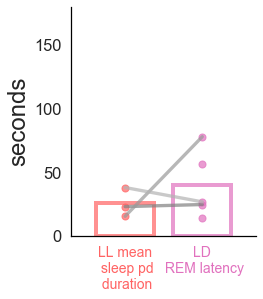

In [27]:
plot_colors = [LD_color, colors[5], LL_color]

axis_color = [.8,.8,.8]
with plt.rc_context({'axes.edgecolor': 'k'}):  # set color of plot outline

    plt.figure(figsize=(4,4.5))
    
    # Bar graph of means
    sleep_pd_durations = SleepDurationStats['sleep pd duration mean'][['Bird 1', 'Bird 2','Bird 3','Bird 4','Bird 5']].values
    REM_latencies = SleepDurationStats['REM latencies mean'][['Bird 1', 'Bird 2','Bird 3','Bird 4','Bird 5']].values
    sleep_pd_durations_LL = SleepDurationStats['sleep pd duration mean'][['Bird 2LL','Bird 3LL','Bird 4LL']].values
    
    
    plt.bar([0], np.mean(sleep_pd_durations_LL), width=.75, color='none', edgecolor=plot_colors[2], linewidth=4, alpha=linealpha)
    plt.bar([1], np.mean(REM_latencies), width=.75, color='none', edgecolor=plot_colors[1], linewidth=4, alpha=linealpha)

    # Line plot of each bird
    for bird in ['Bird 2', 'Bird 3', 'Bird 4']: # LL birds
        stats_LD = SleepDurationStats.loc[bird]
        stats_LL = SleepDurationStats.loc[bird + 'LL']

        plt.plot([0, 1],
                [stats_LL['sleep pd duration mean'],
                 stats_LD['REM latencies mean']],
                 alpha=linealpha, color=colors_birds[int(bird[5])-1],
                 lw=linewidth/1.5)

    for bird in ['Bird 1', 'Bird 5']: # LD-only birds
        stats_LD = SleepDurationStats.loc[bird]

    # Scatter plot of each plot in corresponding color
    plt.scatter(np.repeat(0,3), sleep_pd_durations_LL,
                5*markersize, color=plot_colors[2], alpha=linealpha)
    plt.scatter(np.repeat(1,5), REM_latencies,
                5*markersize, color=plot_colors[1], alpha=linealpha)
    
    plt.xlim(-.7, 1.7)
    plt.ylim(0, 180)
    plt.xticks([0,1], [("LL mean\n sleep pd\n duration"), 
                         ('LD\n REM latency')], fontsize=14)
    for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), [plot_colors[2], plot_colors[1]]):
        ticklabel.set_color(tickcolor)

    plt.ylabel('seconds', fontsize=axis_label_fontsize)  # y label only on leftmost plot

    sns.despine()
    plt.tight_layout()

if savePlots:
        plt.savefig(saveAsPath + saveAsName + "sleep_pd_durations_3_LL_vs_REM_latency.pdf")

## STATS: Fig 9c

In [28]:
# all birds
sleep_pd_durations = SleepDurationStats['sleep pd duration mean'][['Bird 1', 'Bird 2','Bird 3','Bird 4','Bird 5']].values
REM_latencies = SleepDurationStats['REM latencies mean'][['Bird 1', 'Bird 2','Bird 3','Bird 4','Bird 5']].values

print('LD sleep pd durations vs REM latencies (n = 5)')
stat.ttest_rel(sleep_pd_durations, REM_latencies)

LD sleep pd durations vs REM latencies (n = 5)


Ttest_relResult(statistic=3.432434435344276, pvalue=0.02647650834925131)

In [29]:
# include only birds with both LL and LD
sleep_pd_durations = SleepDurationStats['sleep pd duration mean'][['Bird 2','Bird 3','Bird 4']].values
REM_latencies = SleepDurationStats['REM latencies mean'][['Bird 2','Bird 3','Bird 4']].values
sleep_pd_durations_LL = SleepDurationStats['sleep pd duration mean'][['Bird 2LL','Bird 3LL','Bird 4LL']].values

print('LD sleep pd durations vs REM latencies (n = 3)')
stat.ttest_rel(sleep_pd_durations, REM_latencies)

LD sleep pd durations vs REM latencies (n = 3)


Ttest_relResult(statistic=2.7800031631652744, pvalue=0.10869942237770128)

In [30]:
print('LD sleep pd durations vs LL sleep pd durations (n = 3)')
stat.ttest_rel(sleep_pd_durations, sleep_pd_durations_LL)

LD sleep pd durations vs LL sleep pd durations (n = 3)


Ttest_relResult(statistic=3.9899899697451406, pvalue=0.057453989745415206)

In [31]:
print('LL sleep pd durations vs REM latency (n = 3)')
stat.ttest_rel(sleep_pd_durations_LL, REM_latencies)

LL sleep pd durations vs REM latency (n = 3)


Ttest_relResult(statistic=-0.7750838319680784, pvalue=0.519383184949745)

# save to csv

In [34]:
if saveData:
    SleepDurationStats.to_csv(saveAsPath + saveAsName + 'sleep_durations_REM_latencies.csv')
        